## Деревья решений для задач регрессии

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os

# Устанавливаем значение рабочей дирректории.
os.chdir("C:/Users/Michael/Documents/DataSet/Task_9")

# Добавляем в PATH путь до Graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [3]:
# Прочитаем и выведем таблицу данных на экран
ceramics = pd.read_csv(u"Таблица3(Электронно-микрозондовый анализ формовочных масс).tsv", sep='\t')
ceramics

,Территория,Тип_керамики,Номер_образца,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,О-в_Сахалин,Охотский,31,"0,05","0,04","0,94","0,48","0,48","0,04","0,01","0,16","0,83"
1,О-в_Сахалин,Охотский,71,"0,05","0,06","0,88","0,45","0,25","0,30","0,02","0,20","0,78"
2,О-в_Сахалин,Охотский,11,"0,16","0,06","0,78","0,40","0,43","0,17","0,03","0,13","0,83"
3,О-в_Сахалин,Охотский,131,"0,20","0,05","0,75","0,54","0,37","0,09","0,00","0,14","0,86"
4,О-в_Сахалин,Охотский,141,"0,09","0,01","0,89","0,43","0,50","0,08","0,03","0,12","0,85"
...,...,...,...,...,...,...,...,...,...,...,...,...
74,Г._Есаши,Охотский,16,"0,27","0,26","0,47","0,57","0,22","0,21","0,26","0,15","0,59"
75,Г._Есаши,Охотский,22,"0,14","0,53","0,33","0,41","0,12","0,47","0,32","0,20","0,48"
76,Г._Есаши,Охотский,35,"0,15","0,63","0,22","0,56","0,09","0,35","0,11","0,33","0,56"
77,Г._Есаши,Охотский,61,"0,15","0,56","0,29","0,52","0,10","0,37","0,37","0,26","0,37"


In [4]:
# Избавляемся от "Номера образца", т.к. для нас он не нужен
ceramics = ceramics.drop(columns=[u"Номер_образца"])
ceramics

,Территория,Тип_керамики,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,О-в_Сахалин,Охотский,"0,05","0,04","0,94","0,48","0,48","0,04","0,01","0,16","0,83"
1,О-в_Сахалин,Охотский,"0,05","0,06","0,88","0,45","0,25","0,30","0,02","0,20","0,78"
2,О-в_Сахалин,Охотский,"0,16","0,06","0,78","0,40","0,43","0,17","0,03","0,13","0,83"
3,О-в_Сахалин,Охотский,"0,20","0,05","0,75","0,54","0,37","0,09","0,00","0,14","0,86"
4,О-в_Сахалин,Охотский,"0,09","0,01","0,89","0,43","0,50","0,08","0,03","0,12","0,85"
...,...,...,...,...,...,...,...,...,...,...,...
74,Г._Есаши,Охотский,"0,27","0,26","0,47","0,57","0,22","0,21","0,26","0,15","0,59"
75,Г._Есаши,Охотский,"0,14","0,53","0,33","0,41","0,12","0,47","0,32","0,20","0,48"
76,Г._Есаши,Охотский,"0,15","0,63","0,22","0,56","0,09","0,35","0,11","0,33","0,56"
77,Г._Есаши,Охотский,"0,15","0,56","0,29","0,52","0,10","0,37","0,37","0,26","0,37"


In [5]:
# Правильный ответ записываем в вектор y (отклик)
y = ceramics[[u"Территория", u"Тип_керамики"]]
# Удаляем колонку с правильным ответом (предиктор)
X = ceramics.drop([u"Территория", u"Тип_керамики"], axis=1)

In [6]:
# Выводим таблицу откликов
y

,Территория,Тип_керамики
0,О-в_Сахалин,Охотский
1,О-в_Сахалин,Охотский
2,О-в_Сахалин,Охотский
3,О-в_Сахалин,Охотский
4,О-в_Сахалин,Охотский
...,...,...
74,Г._Есаши,Охотский
75,Г._Есаши,Охотский
76,Г._Есаши,Охотский
77,Г._Есаши,Охотский


In [7]:
# Выводим таблицу предикторов
X

,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,"0,05","0,04","0,94","0,48","0,48","0,04","0,01","0,16","0,83"
1,"0,05","0,06","0,88","0,45","0,25","0,30","0,02","0,20","0,78"
2,"0,16","0,06","0,78","0,40","0,43","0,17","0,03","0,13","0,83"
3,"0,20","0,05","0,75","0,54","0,37","0,09","0,00","0,14","0,86"
4,"0,09","0,01","0,89","0,43","0,50","0,08","0,03","0,12","0,85"
...,...,...,...,...,...,...,...,...,...
74,"0,27","0,26","0,47","0,57","0,22","0,21","0,26","0,15","0,59"
75,"0,14","0,53","0,33","0,41","0,12","0,47","0,32","0,20","0,48"
76,"0,15","0,63","0,22","0,56","0,09","0,35","0,11","0,33","0,56"
77,"0,15","0,56","0,29","0,52","0,10","0,37","0,37","0,26","0,37"


In [8]:
# Выведем колличество всех классов 
y.value_counts()

Территория   Тип_керамики
О-в_Ребун    Охотский        16
О-в_Рисири   Охотский        12
О-в_Сахалин  Охотский        12
Г._Вакканай  Сусуйский       11
             Охотский        10
О-в_Рисири   Сусуйский        7
Г._Есаши     Охотский         6
О-в_Сахалин  Сусуйский        3
О-в_Ребун    Сусуйский        2
dtype: int64

In [9]:
# Отфарматируем запись дробных чисел, чтобы мы могли с ними работать, как с числами
X = X.replace(',','.', regex=True)
X

,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,0.05,0.04,0.94,0.48,0.48,0.04,0.01,0.16,0.83
1,0.05,0.06,0.88,0.45,0.25,0.30,0.02,0.20,0.78
2,0.16,0.06,0.78,0.40,0.43,0.17,0.03,0.13,0.83
3,0.20,0.05,0.75,0.54,0.37,0.09,0.00,0.14,0.86
4,0.09,0.01,0.89,0.43,0.50,0.08,0.03,0.12,0.85
...,...,...,...,...,...,...,...,...,...
74,0.27,0.26,0.47,0.57,0.22,0.21,0.26,0.15,0.59
75,0.14,0.53,0.33,0.41,0.12,0.47,0.32,0.20,0.48
76,0.15,0.63,0.22,0.56,0.09,0.35,0.11,0.33,0.56
77,0.15,0.56,0.29,0.52,0.10,0.37,0.37,0.26,0.37


In [10]:
# Разобьём нашу выборку на тренировочные и тестовую выборку
# Производим разбиение таким образом, чтобы доля значений в тестовой выборке была такой же
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)

In [11]:
# Выведем колличество всех классов в тренировочной выборке 
y_train.value_counts()

Территория   Тип_керамики
О-в_Ребун    Охотский        13
Г._Вакканай  Сусуйский        9
О-в_Рисири   Охотский         9
О-в_Сахалин  Охотский         9
Г._Вакканай  Охотский         8
О-в_Рисири   Сусуйский        6
Г._Есаши     Охотский         5
О-в_Ребун    Сусуйский        2
О-в_Сахалин  Сусуйский        2
dtype: int64

In [12]:
# Выведем колличество всех классов в тестовой выборке
y_test.value_counts()

Территория   Тип_керамики
О-в_Ребун    Охотский        3
О-в_Рисири   Охотский        3
О-в_Сахалин  Охотский        3
Г._Вакканай  Охотский        2
             Сусуйский       2
Г._Есаши     Охотский        1
О-в_Рисири   Сусуйский       1
О-в_Сахалин  Сусуйский       1
dtype: int64

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               # максимальная глубина дерева
                               # max_depth=4,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None
                              )

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

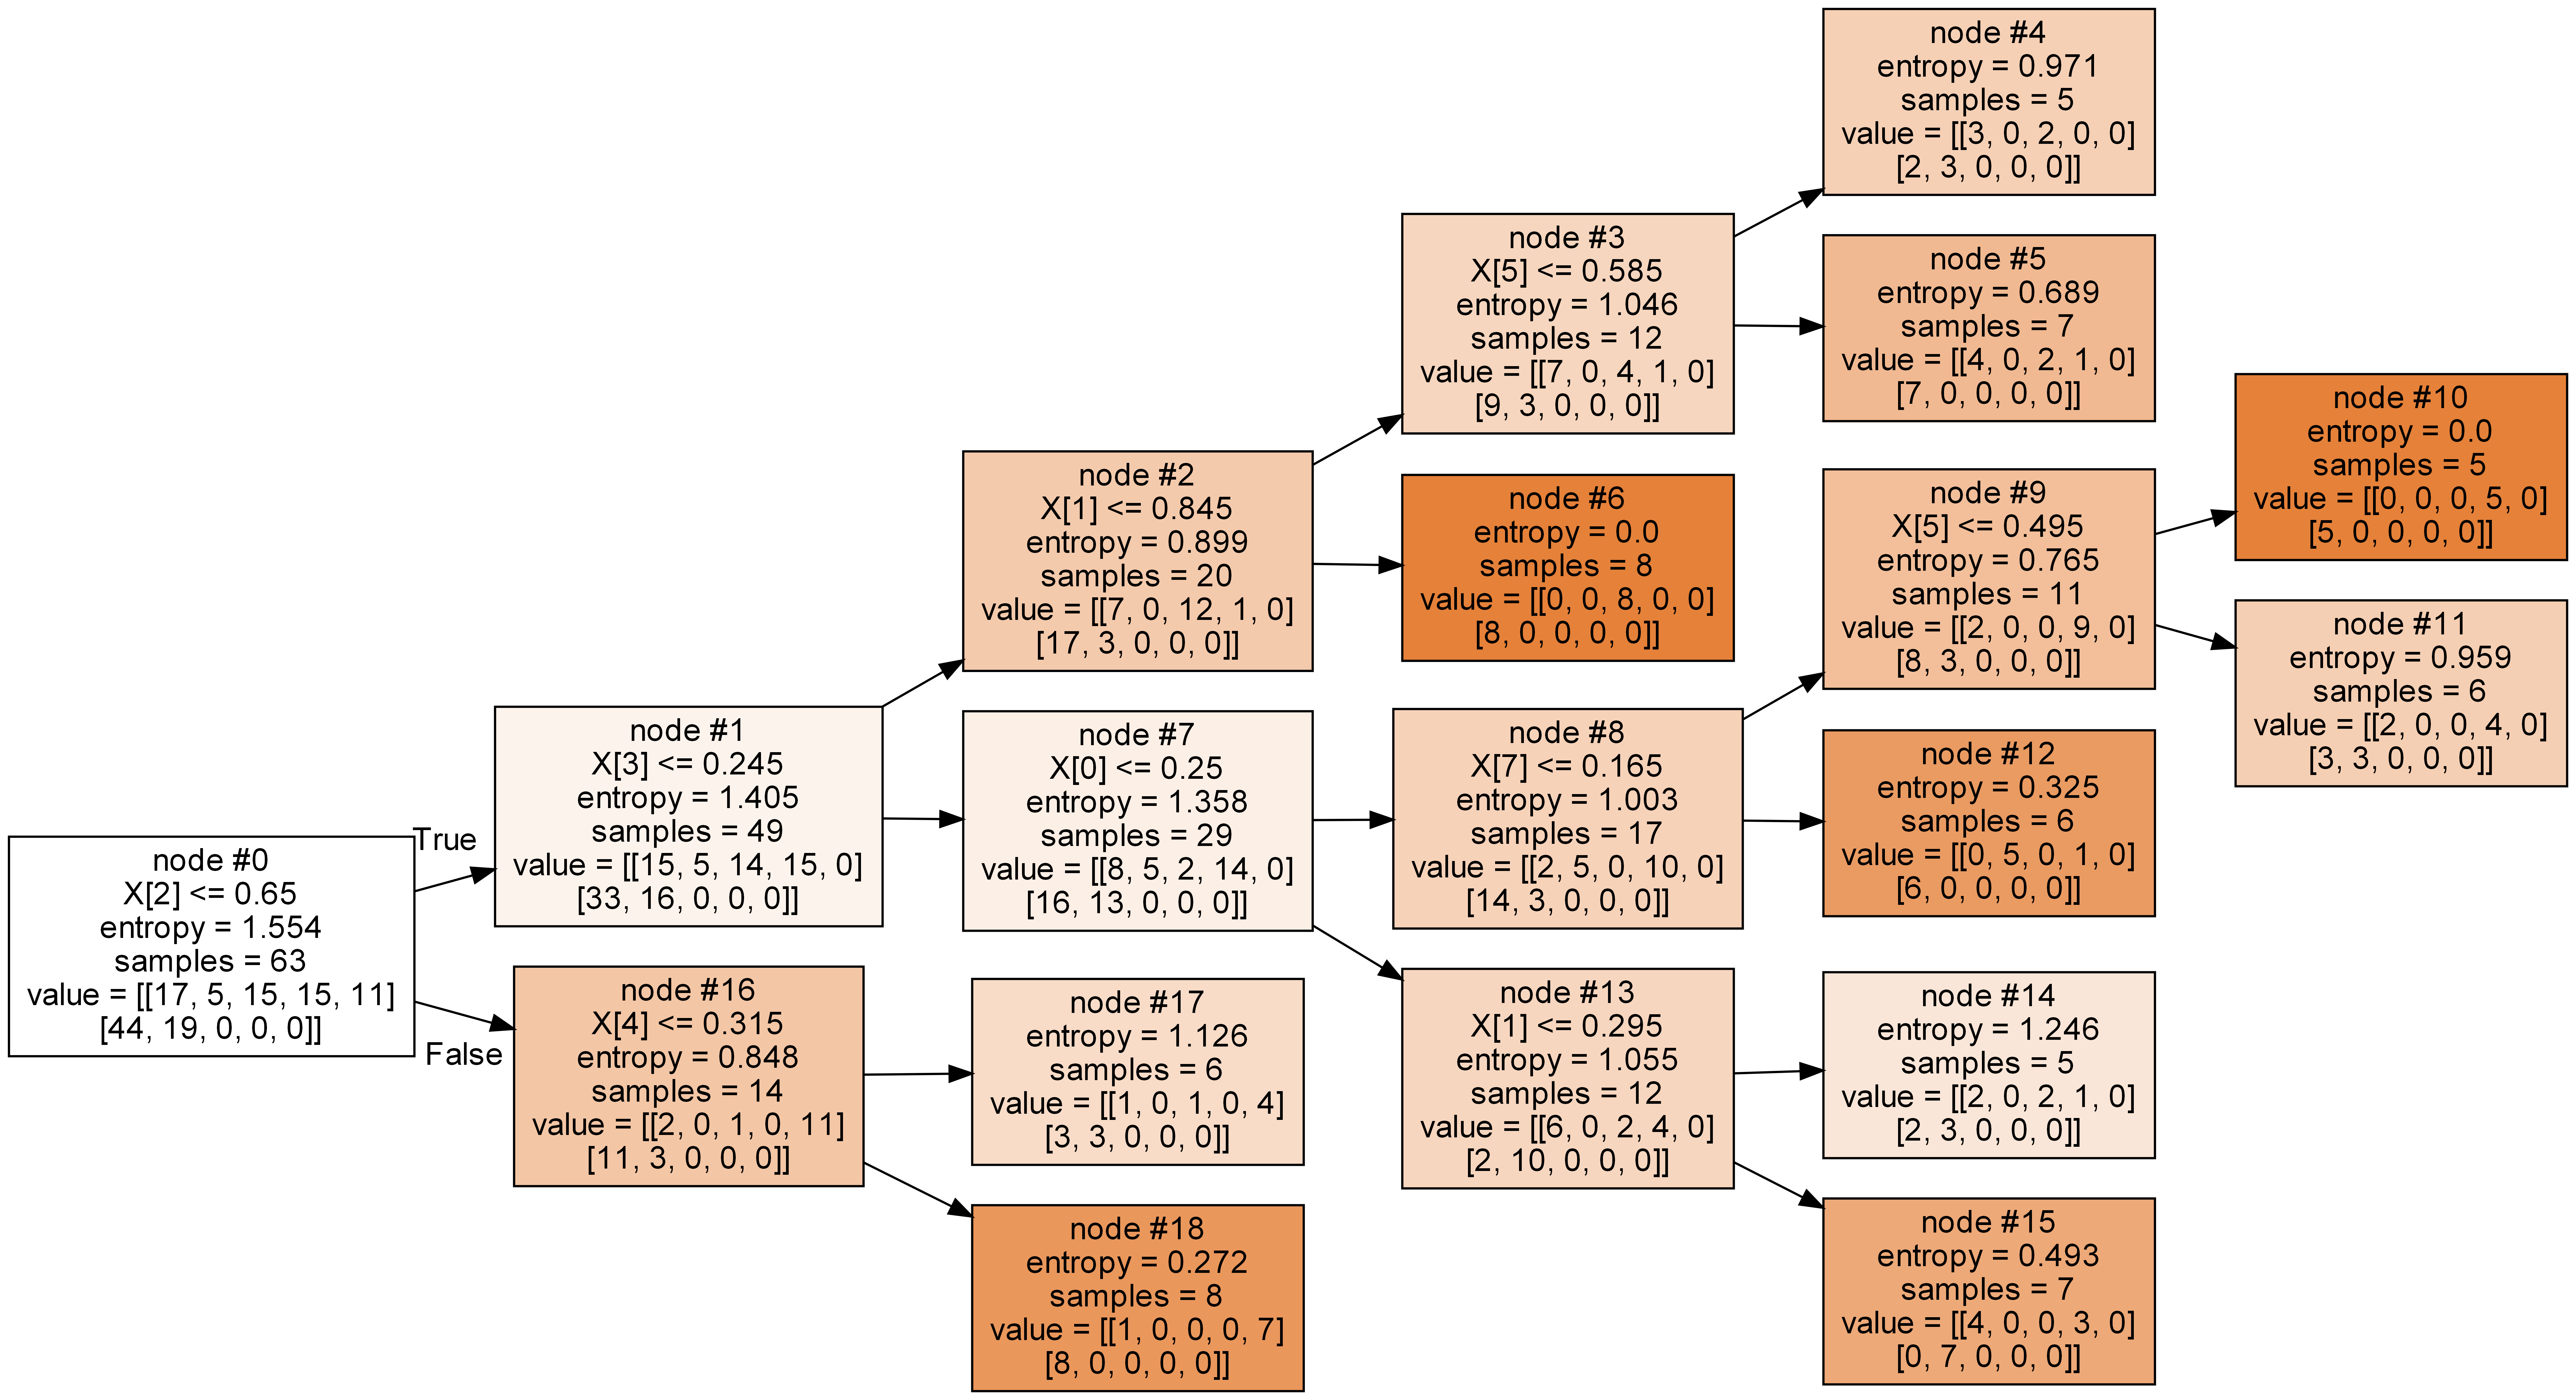

In [14]:
from sklearn.tree import export_graphviz
from subprocess import call

# Экспортировать как файл .dot
export_graphviz(model,
                # задаём название .dot файла
                out_file='tree.dot',
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать количество каждого класса в узлах
                proportion=False,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
               )

# Конвертируем в png с помощью системной команды
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Отображаем в блокноте jupyter
from IPython.display import Image
Image(filename = 'tree.png')

In [15]:
# Выведем оценку значимости переменных
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
2,SiO2,0.278158
3,Na,0.185270
0,K,0.156199
1,Ca,0.135713
7,Ti,0.107888
5,Ca.1,0.089258
4,K.1,0.047514
6,Mg,0.000000
8,Fe,0.000000


In [16]:
# Строим предсказание модели на тестовом множестве
y_pred = model.predict(X_test)

In [17]:
y_pred

array([['О-в_Рисири', 'Охотский'],
       ['Г._Вакканай', 'Сусуйский'],
       ['Г._Вакканай', 'Сусуйский'],
       ['Г._Вакканай', 'Охотский'],
       ['Г._Есаши', 'Охотский'],
       ['О-в_Сахалин', 'Охотский'],
       ['О-в_Ребун', 'Охотский'],
       ['О-в_Ребун', 'Охотский'],
       ['Г._Вакканай', 'Сусуйский'],
       ['О-в_Рисири', 'Охотский'],
       ['О-в_Сахалин', 'Охотский'],
       ['О-в_Ребун', 'Охотский'],
       ['Г._Вакканай', 'Сусуйский'],
       ['О-в_Сахалин', 'Охотский'],
       ['О-в_Сахалин', 'Охотский'],
       ['Г._Вакканай', 'Сусуйский']], dtype=object)

In [18]:
y_pred.shape

(16, 2)

In [19]:
# Возвращаем копию массива сжатую до одного измерения
y_test = y_test.to_numpy().flatten()

In [27]:
y_pred

array(['О-в_Рисири', 'Охотский', 'О-в_Сахалин', 'Охотский', 'Г._Вакканай',
       'Сусуйский', 'О-в_Ребун', 'Охотский', 'Г._Вакканай', 'Сусуйский',
       'О-в_Рисири', 'Охотский', 'Г._Вакканай', 'Охотский', 'О-в_Ребун',
       'Охотский', 'Г._Есаши', 'Охотский', 'Г._Есаши', 'Охотский',
       'О-в_Рисири', 'Охотский', 'О-в_Сахалин', 'Охотский', 'Г._Вакканай',
       'Сусуйский', 'Г._Вакканай', 'Сусуйский', 'О-в_Ребун', 'Охотский',
       'О-в_Рисири', 'Охотский', 'Г._Вакканай', 'Охотский', 'Г._Есаши',
       'Охотский', 'Г._Вакканай', 'Сусуйский', 'О-в_Сахалин', 'Охотский',
       'О-в_Сахалин', 'Охотский', 'Г._Вакканай', 'Охотский', 'О-в_Ребун',
       'Охотский', 'Г._Вакканай', 'Сусуйский', 'О-в_Сахалин', 'Охотский',
       'О-в_Сахалин', 'Охотский', 'Г._Вакканай', 'Сусуйский', 'Г._Есаши',
       'Охотский', 'Г._Вакканай', 'Сусуйский', 'О-в_Сахалин', 'Охотский',
       'Г._Вакканай', 'Сусуйский', 'О-в_Рисири', 'Охотский',
       'Г._Вакканай', 'Охотский', 'О-в_Рисири', 'Охотский', '

In [20]:
y_pred = y_pred.flatten()

In [21]:
# Убедимся в правильной размерности
y_test.shape

(32,)

In [22]:
# # Убедимся в правильной размерности
y_pred.shape

(32,)

In [23]:
y_pred

array(['О-в_Рисири', 'Охотский', 'Г._Вакканай', 'Сусуйский',
       'Г._Вакканай', 'Сусуйский', 'Г._Вакканай', 'Охотский', 'Г._Есаши',
       'Охотский', 'О-в_Сахалин', 'Охотский', 'О-в_Ребун', 'Охотский',
       'О-в_Ребун', 'Охотский', 'Г._Вакканай', 'Сусуйский', 'О-в_Рисири',
       'Охотский', 'О-в_Сахалин', 'Охотский', 'О-в_Ребун', 'Охотский',
       'Г._Вакканай', 'Сусуйский', 'О-в_Сахалин', 'Охотский',
       'О-в_Сахалин', 'Охотский', 'Г._Вакканай', 'Сусуйский'],
      dtype=object)

In [24]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics

# Смотрим, сколько у нас было наблюдений и сколько раз мы правильно разгадали класс
multilabel_confusion_matrix(y_test, y_pred)

array([[[25,  3],
        [ 1,  3]],

       [[30,  1],
        [ 1,  0]],

       [[27,  2],
        [ 2,  1]],

       [[28,  0],
        [ 2,  2]],

       [[28,  0],
        [ 0,  4]],

       [[18,  2],
        [ 3,  9]],

       [[25,  3],
        [ 2,  2]]], dtype=int64)

In [25]:
# Выводим оценку качества классификации
print (metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

 Г._Вакканай       0.75      0.50      0.60         6
    Г._Есаши       0.00      0.00      0.00         1
   О-в_Ребун       0.33      0.33      0.33         3
  О-в_Рисири       0.50      1.00      0.67         2
 О-в_Сахалин       1.00      1.00      1.00         4
    Охотский       0.75      0.82      0.78        11
   Сусуйский       0.50      0.40      0.44         5

    accuracy                           0.66        32
   macro avg       0.55      0.58      0.55        32
weighted avg       0.66      0.66      0.65        32



In [26]:
# Строим предсказание модели на тренировочном множестве
y_pred = model.predict(X_train)

# Возвращаем копию массива сжатую до одного измерения
y_train = y_train.to_numpy().flatten()
y_pred = y_pred.flatten()

# Выводим оценку качества классификации
print (metrics.classification_report(y_pred, y_train))

              precision    recall  f1-score   support

 Г._Вакканай       0.76      0.54      0.63        24
    Г._Есаши       1.00      0.83      0.91         6
   О-в_Ребун       0.53      1.00      0.70         8
  О-в_Рисири       0.60      0.82      0.69        11
 О-в_Сахалин       1.00      0.79      0.88        14
    Охотский       0.91      0.87      0.89        46
   Сусуйский       0.68      0.76      0.72        17

    accuracy                           0.79       126
   macro avg       0.78      0.80      0.77       126
weighted avg       0.81      0.79      0.79       126

